In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling

df = pd.read_csv('2019_Climate_Investment_Funds___Clean_Technology_Fund__CTF__results_data.csv')
df.head()

,Reporting Year,Project Title,Country,Region,Public/Private,Technology Focus,Specific Technology,CTF funding (USD millions),MDB,Lifetime,...,"Cumulative Co-financing (others, US$m)","Cumulative Installed capacity (total, MW)","Cumulative Installed capacity (wind, MW)","Cumulative Installed capacity (solar, MW)","Cumulative Installed capacity (hydro, MW)","Cumulative Installed capacity (geothermal, MW)","Cumulative Installed capacity (mixed, MW)","Cumulative Additional passengers (upon implementation, passengers per day)","Cumulative Energy savings (annual, GWh/ yr.)",Fund
0,2019,Concentrated Solar Power Project,Chile,LAC,Private,Renewable Energy,RE-Solar,67.00,IDB,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,CTF
1,2019,Large-Scale Photo-Voltaic Program,Chile,LAC,Private,Renewable Energy,RE-Solar,25.00,IDB,20,...,0.0,72.0,0.0,72.0,0.0,0.0,0.0,0.0,0.00,CTF
2,2019,Energy Efficiency and Self-Supply Renewable En...,Chile,LAC,Private,Renewable Energy / Energy Efficiency,Renewable Energy/Energy Efficiency,25.28,IDB,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.24,CTF
3,2019,Geothermal Risk Mitigation Program (MiRiG) – A...,Chile,LAC,Private,Renewable Energy,RE-Geothermal,74.98,IDB,30,...,0.0,48.0,0.0,0.0,0.0,48.0,0.0,0.0,0.00,CTF
4,2019,Non-Conventional Renewable Energy,Colombia,LAC,Private,Renewable Energy,RE-Mixed,10.00,IDB,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,CTF


In [29]:
#find missing data
missing_count = df.isnull().sum()
missing_count

Reporting Year                                                                        0
Project Title                                                                         0
Country                                                                               0
Region                                                                                0
Public/Private                                                                        0
Technology Focus                                                                      0
Specific Technology                                                                   0
CTF funding (USD millions)                                                            0
MDB                                                                                   0
Lifetime                                                                              0
Expected GHG reductions (lifetime, tCO2)                                              0
Expected GHG reductions (annual,

In [30]:
#fix whitespace at end of Country and group by countries
df = df.rename({'Country ':'Country'}, axis=1)
grouped_c = df.groupby('Country')
grouped_c.get_group('Chile')

,Reporting Year,Project Title,Country,Region,Public/Private,Technology Focus,Specific Technology,CTF funding (USD millions),MDB,Lifetime,...,"Cumulative Co-financing (others, US$m)","Cumulative Installed capacity (total, MW)","Cumulative Installed capacity (wind, MW)","Cumulative Installed capacity (solar, MW)","Cumulative Installed capacity (hydro, MW)","Cumulative Installed capacity (geothermal, MW)","Cumulative Installed capacity (mixed, MW)","Cumulative Additional passengers (upon implementation, passengers per day)","Cumulative Energy savings (annual, GWh/ yr.)",Fund
0,2019,Concentrated Solar Power Project,Chile,LAC,Private,Renewable Energy,RE-Solar,67.00,IDB,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,CTF
1,2019,Large-Scale Photo-Voltaic Program,Chile,LAC,Private,Renewable Energy,RE-Solar,25.00,IDB,20,...,0.0,72.0,0.0,72.0,0.0,0.0,0.0,0.0,0.00,CTF
2,2019,Energy Efficiency and Self-Supply Renewable En...,Chile,LAC,Private,Renewable Energy / Energy Efficiency,Renewable Energy/Energy Efficiency,25.28,IDB,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.24,CTF
3,2019,Geothermal Risk Mitigation Program (MiRiG) – A...,Chile,LAC,Private,Renewable Energy,RE-Geothermal,74.98,IDB,30,...,0.0,48.0,0.0,0.0,0.0,48.0,0.0,0.0,0.00,CTF


In [31]:
#make sure country data entires are accurate
country_check = df['Country'].unique()
country_check.sort()
print(country_check)

['Brazil' 'Chile' 'Colombia' 'DPSP III' 'DPSP-Regional' 'Egypt' 'Haiti'
 'Honduras' 'India' 'Indonesia' 'Kazakhstan' 'Kenya' 'MENA-CSP' 'Mexico'
 'Morocco' 'Nicaragua' 'Nigeria' 'Philippines' 'South Africa' 'Thailand'
 'Turkey' 'Ukraine' 'Vietnam']


In [32]:
#clean data to make sure only countries are taken into account
df = df[df.Country != 'MENA-CSP']
df = df[df.Country != 'DPSP III']
df = df[df.Country != 'DPSP-Regional']
country_check = df['Country'].unique()
country_check.sort()
print(country_check)

['Brazil' 'Chile' 'Colombia' 'Egypt' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Kazakhstan' 'Kenya' 'Mexico' 'Morocco' 'Nicaragua' 'Nigeria'
 'Philippines' 'South Africa' 'Thailand' 'Turkey' 'Ukraine' 'Vietnam']


In [33]:
energy_type_check = df['Technology Focus'].unique()
energy_type_check.sort()
energy_type_check

array(['Energy Efficiency', 'Renewable Energy',
       'Renewable Energy / Energy Efficiency',
       'Renewable Energy/Energy Eficiency', 'Transport'], dtype=object)

In [34]:
#fix the 'Renewable Energy / Energy Efficiency' data inconsistency
df['Technology Focus'].replace({'Renewable Energy/Energy Eficiency': 'Renewable Energy / Energy Efficiency'}, inplace=True)
check=df['Technology Focus'].unique()
check

array(['Renewable Energy', 'Renewable Energy / Energy Efficiency',
       'Energy Efficiency', 'Transport'], dtype=object)

In [35]:
#count of projects per country
tech_type = df['Technology Focus'].groupby(df['Country'])

tech_type.count()

Country
Brazil           1
Chile            4
Colombia        10
Egypt            1
Haiti            1
Honduras         1
India            8
Indonesia        3
Kazakhstan       2
Kenya            1
Mexico           8
Morocco          3
Nicaragua        1
Nigeria          1
Philippines      6
South Africa     5
Thailand         3
Turkey           8
Ukraine          7
Vietnam          3
Name: Technology Focus, dtype: int64

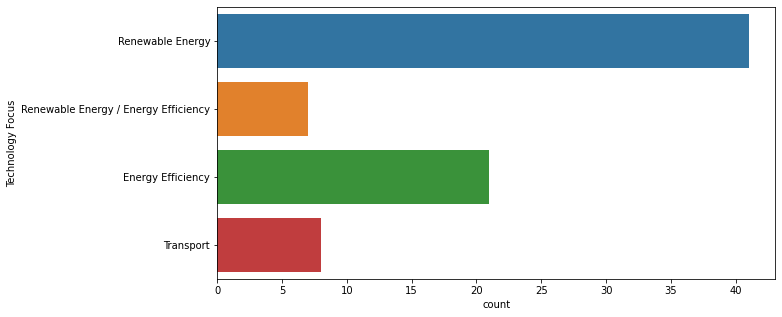

In [36]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y=df['Technology Focus'], data=df)

In [37]:
#check specific technology entires
check_spec_tech = df['Specific Technology'].unique()
check_spec_tech.sort()
check_spec_tech

array(['EE-District Heating', 'EE-End USe', 'EE-Multiple', 'EE-Other',
       'EE-Smart Grid', 'RE-Geothermal', 'RE-Hydropower', 'RE-Mixed',
       'RE-Solar', 'RE-Wind', 'Renewable Energy/Energy Efficiency',
       'Renewable Energy/Energy Eficiency', 'TR-Mass Transit', 'TR-Other',
       'TR-Vehicle Technologies'], dtype=object)

In [38]:
#fix data entry
df['Specific Technology'].replace({'Renewable Energy/Energy Eficiency': 'Renewable Energy/Energy Efficiency'}, inplace=True)
check_st=df['Specific Technology'].unique()
check_st

array(['RE-Solar', 'Renewable Energy/Energy Efficiency', 'RE-Geothermal',
       'RE-Mixed', 'EE-End USe', 'EE-District Heating', 'EE-Other',
       'RE-Wind', 'EE-Multiple', 'TR-Mass Transit', 'TR-Other',
       'EE-Smart Grid', 'RE-Hydropower', 'TR-Vehicle Technologies'],
      dtype=object)

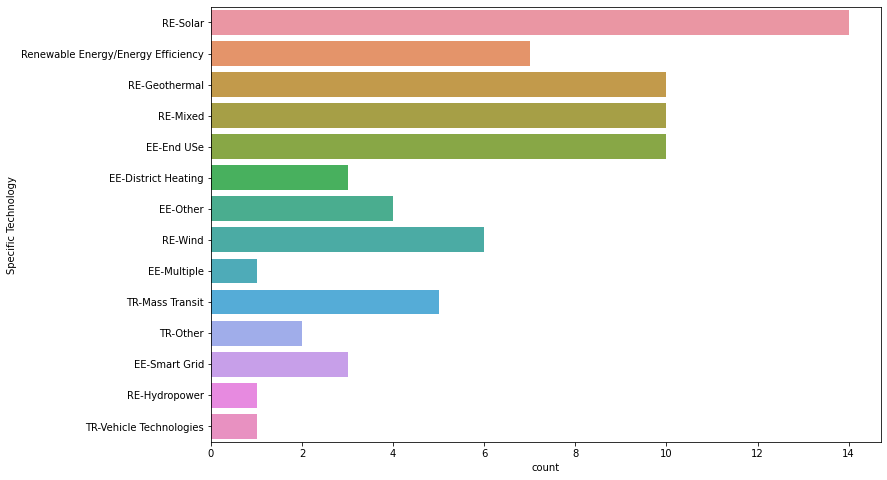

In [39]:
#number of projects by specific technology
fig=plt.figure(figsize=(12,8))

sns.countplot(y=df['Specific Technology'], data=df)

In [40]:
#CTF funding by country
country_funding = df['CTF funding (USD millions)'].groupby(df['Country'])
country_funding.sum().sort_values(ascending=False)

Country
India           775.00
Mexico          517.90
South Africa    434.34
Turkey          386.70
Indonesia       324.60
Ukraine         277.50
Chile           192.26
Vietnam         179.94
Morocco         175.00
Colombia        164.39
Egypt           150.00
Philippines     138.28
Thailand        110.85
Kazakhstan       73.13
Kenya            30.00
Honduras         20.00
Brazil           20.00
Haiti            16.00
Nicaragua        10.00
Nigeria           1.25
Name: CTF funding (USD millions), dtype: float64

Text(0.5, 0, 'Country')

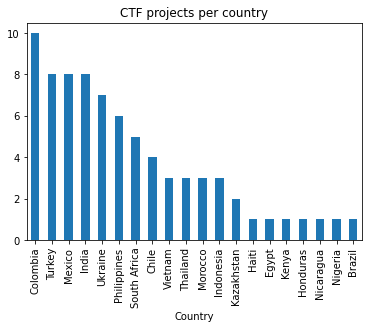

In [41]:
#number of CTF projects per country
tech_count = tech_type.count().sort_values(ascending=False)

plot_fund_country = tech_count.plot.bar(title="CTF projects per country")

plot_fund_country.set_xlabel('Country')

Text(0, 0.5, 'Average amount (USD Millions)')

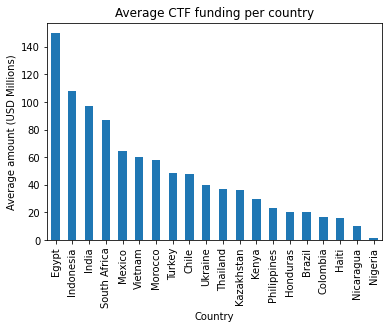

In [42]:
#average funding recieved by each country
fund_avg_plot = country_funding.mean().sort_values(ascending=False).plot.bar(title="Average CTF funding per country")

fund_avg_plot.set_xlabel("Country")
fund_avg_plot.set_ylabel("Average amount (USD Millions)")

Text(0, 0.5, '(annual, tCO2/ yr.)')

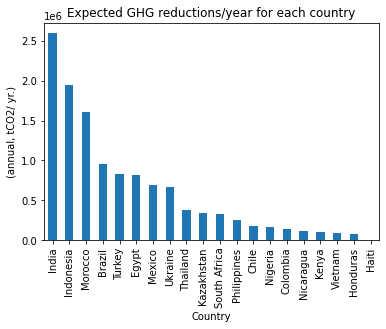

In [43]:
#expected GHG reductions per year by country
ghg_reduct_country = df['Expected GHG reductions (annual, tCO2/ yr.)'].groupby(df['Country'])
ghg_reduct_country.mean().sort_values(ascending=False)

plot_ghg_country = ghg_reduct_country.mean().sort_values(ascending=False).plot.bar(title="Expected GHG reductions/year for each country")
plot_ghg_country.set_xlabel("Country")
plot_ghg_country.set_ylabel("(annual, tCO2/ yr.)")

Text(0, 0.5, '(annual, tCO2/ yr.)')

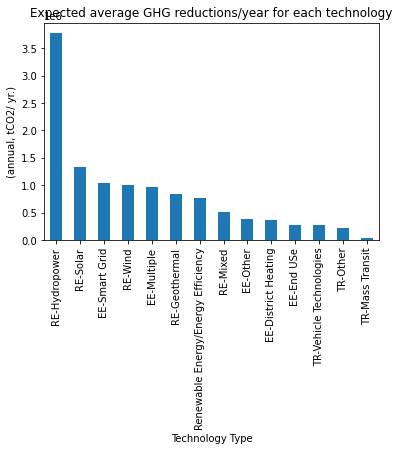

In [44]:
#expected GHG reductions per year by specific technology
ghg_reduct_tech = df['Expected GHG reductions (annual, tCO2/ yr.)'].groupby(df['Specific Technology'])
ghg_reduct_tech.mean().sort_values(ascending=False)

plot_ghg_tech = ghg_reduct_tech.mean().sort_values(ascending=False).plot.bar(title="Expected average GHG reductions/year for each technology")
plot_ghg_tech.set_xlabel("Technology Type")
plot_ghg_tech.set_ylabel("(annual, tCO2/ yr.)")

Text(0, 0.5, 'GHG reduction (tCO2/yr)')

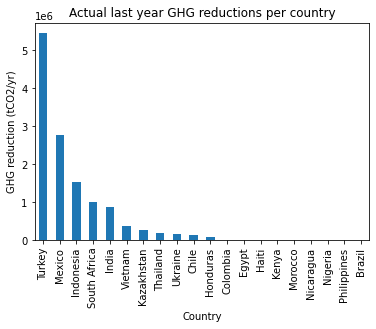

In [67]:
#actual ghg reductions expected per country

total_ghg_reduct_country = df['Actual Latest Year GHG reductions (annual, tCO2/ yr.)'].groupby(df['Country'])
plot_total_ghg_country = total_ghg_reduct_country.sum().sort_values(ascending=False).plot.bar(title='Actual last year GHG reductions per country')

plot_total_ghg_country.set_xlabel('Country')
plot_total_ghg_country.set_ylabel('GHG reduction (tCO2/yr)')

Text(0, 0.5, 'GHG reduction (tCO2/yr)')

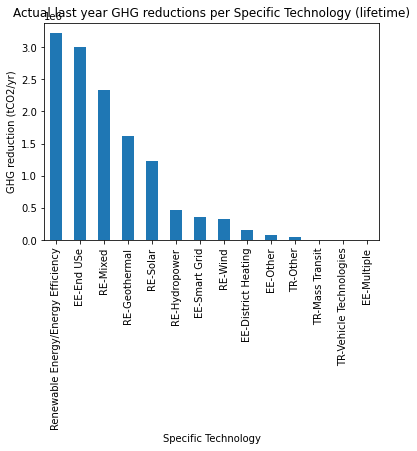

In [68]:
#total expected ghg reduction per tech type
total_ghg_reduct_tech = df['Actual Latest Year GHG reductions (annual, tCO2/ yr.)'].groupby(df['Specific Technology'])
plot_total_ghg_tech = total_ghg_reduct_tech.sum().sort_values(ascending=False).plot.bar(title='Actual last year GHG reductions per Specific Technology (lifetime)')

plot_total_ghg_tech.set_xlabel('Specific Technology')
plot_total_ghg_tech.set_ylabel('GHG reduction (tCO2/yr)')

Text(0, 0.5, 'Lifetime (years)')

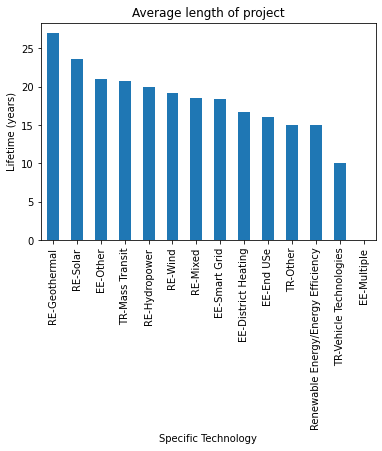

In [49]:
#average length of project per tech type
avg_project_lifetime = df['Lifetime'].groupby(df['Specific Technology'])
plot_project_life = avg_project_lifetime.mean().sort_values(ascending=False).plot.bar(title='Average length of project')

plot_project_life.set_xlabel('Specific Technology')
plot_project_life.set_ylabel('Lifetime (years)')

Text(0, 0.5, 'USD millions')

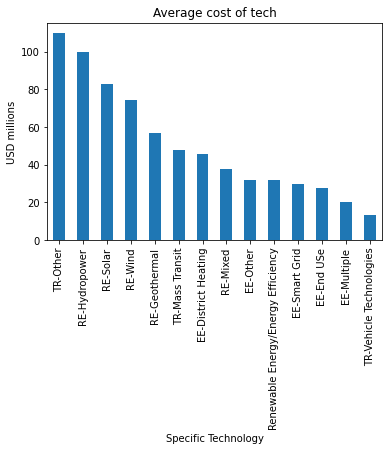

In [50]:
#average funding per tech

tech_fund = df['CTF funding (USD millions)'].groupby(df['Specific Technology'])

plot_tech_fund = df['CTF funding (USD millions)'].groupby(df['Specific Technology']).mean().sort_values(ascending=False).plot.bar(title='Average cost of tech')

plot_tech_fund.set_ylabel('USD millions')

Text(0, 0.5, 'energy savings (GWh/ yr.)')

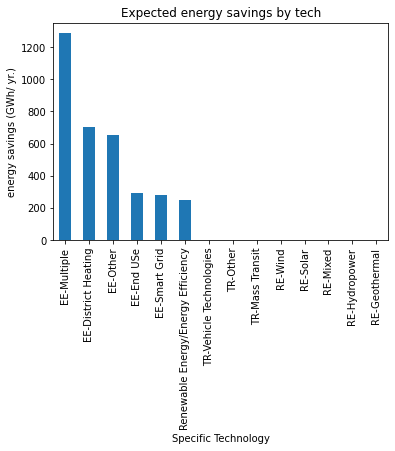

In [63]:
#expected annual energy savings by tech
expect_energy = df['Expected Energy savings (annual, GWh/ yr.)'].groupby(df['Specific Technology'])
plot_energy = expect_energy.mean().sort_values(ascending=False).plot.bar(title='Expected energy savings by tech')
plot_energy.set_ylabel('energy savings (GWh/ yr.)')

Text(0, 0.5, 'energy savings (GWh/ yr.)')

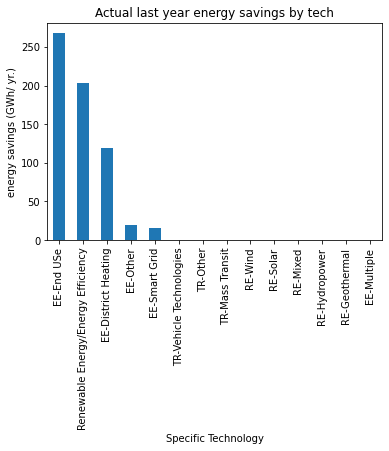

In [59]:
#actual annual energy savings by tech
actual_energy = df['Actual Latest Year Energy savings (annual, GWh/ yr.)'].groupby(df['Specific Technology'])
plot_energy_actual = actual_energy.mean().sort_values(ascending=False).plot.bar(title='Actual last year energy savings by tech')
plot_energy_actual.set_ylabel('energy savings (GWh/ yr.)')

<Figure size 1440x3600 with 0 Axes>

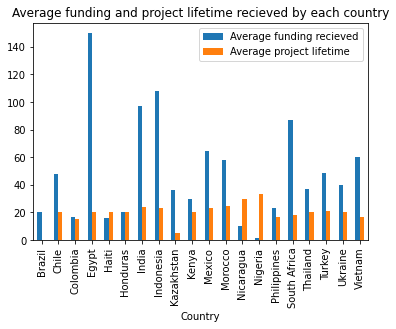

In [55]:
#average funding recieved by each country versus average lifetime of projects in these countries
fund_ghg_country = pd.DataFrame({'Average funding recieved': df['CTF funding (USD millions)'].groupby(df['Country']).mean(),
                           'Average project lifetime': df['Lifetime'].groupby(df['Country']).mean(),
                           }
                          )

fig = plt.figure(figsize=(20,50))
fund_ghg_country.plot.bar(title="Average funding and project lifetime recieved by each country")

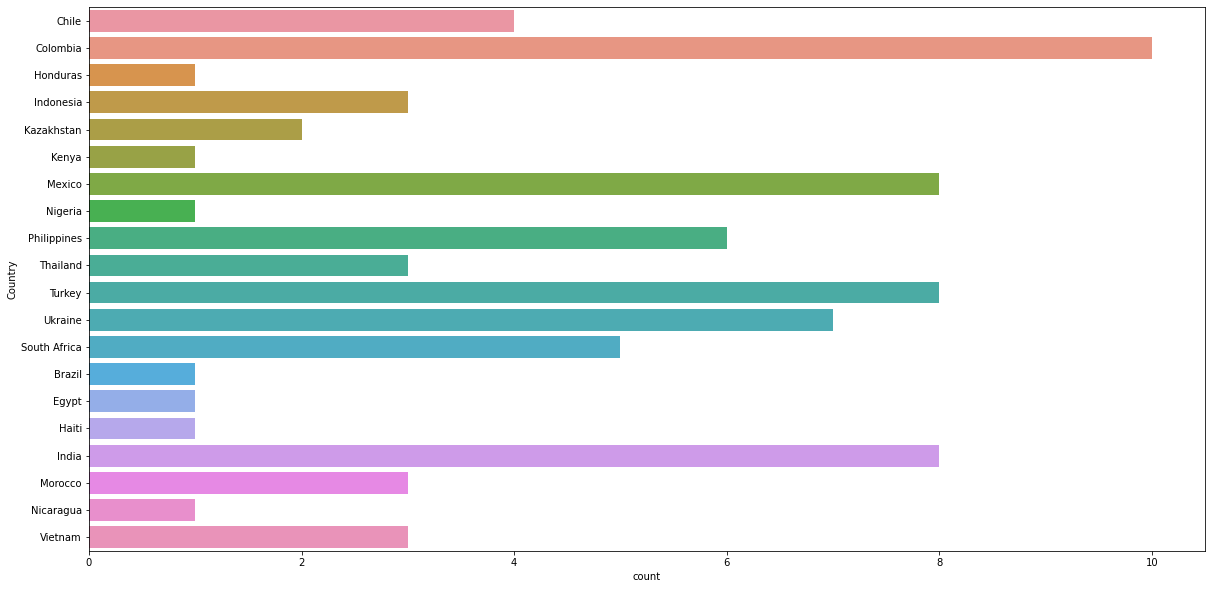

In [56]:
#plot to show number of projects per country
fig=plt.figure(figsize=(20,10))


sns.countplot(y=df['Country'], data=df)


<Figure size 1440x3600 with 0 Axes>

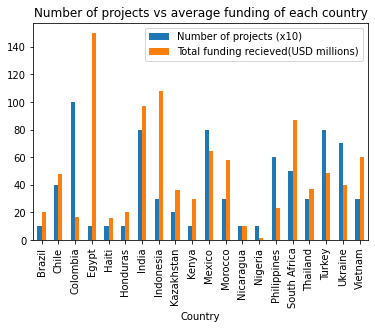

In [57]:
#average funding recieved by each country versus average lifetime of projects in these countries
#multiplied project number by 10 to make for easier reading as funding is in millions
projects_fund = pd.DataFrame({'Number of projects (x10)': (df['Country'].groupby(df['Country']).count())*10,
                           'Total funding recieved(USD millions)': df['CTF funding (USD millions)'].groupby(df['Country']).mean(),
                           }
                          )

fig = plt.figure(figsize=(20,50))
projects_fund.plot.bar(title="Number of projects vs average funding of each country")

<Figure size 1440x3600 with 0 Axes>

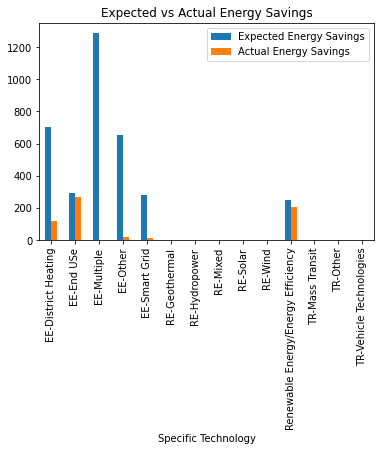

In [64]:
#Expected vs Actual Energy Savings
projects_fund = pd.DataFrame({'Expected Energy Savings': expect_energy.mean(),
                           'Actual Energy Savings': actual_energy.mean(),
                           }
                          )

fig = plt.figure(figsize=(20,50))
projects_fund.plot.bar(title="Expected vs Actual Energy Savings")

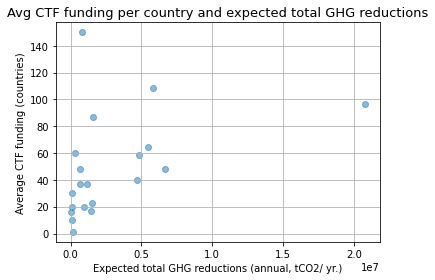

In [65]:
#vis to show relationship between amount of funding a country recieves and the reductions of GHG expected

country_funding = df['CTF funding (USD millions)'].groupby(df['Country'])

ghg_reduct_country = df['Expected GHG reductions (annual, tCO2/ yr.)'].groupby(df['Country'])

fig, ax=plt.subplots()


ax.scatter(ghg_reduct_country.sum(), country_funding.mean(), alpha =0.5)

ax.set_xlabel('Expected total GHG reductions (annual, tCO2/ yr.)')
ax.set_ylabel('Average CTF funding (countries)')
ax.set_title('Avg CTF funding per country and expected total GHG reductions', fontsize=13)

ax.grid(True)
fig.tight_layout()

#ax.bar(ghg_reduct_country.sum(), label='Expected Total GHG reductions (tCO2/year)')


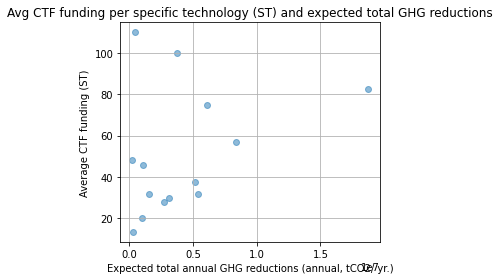

In [69]:
#graph to show the relationship between price of technology and GHG reductions (effectiveness)
fig,ax=plt.subplots()

technology_funding = df['CTF funding (USD millions)'].groupby(df['Specific Technology'])

ghg_reduct_project = df['Expected GHG reductions (annual, tCO2/ yr.)'].groupby(df['Specific Technology'])

ax.scatter(ghg_reduct_project.sum(), technology_funding.mean(), alpha=0.5)

ax.set_xlabel('Expected total annual GHG reductions (annual, tCO2/ yr.)')
ax.set_ylabel('Average CTF funding (ST)')
ax.set_title('Avg CTF funding per specific technology (ST) and expected total GHG reductions', fontsize=12)

ax.grid(True)
fig.tight_layout()

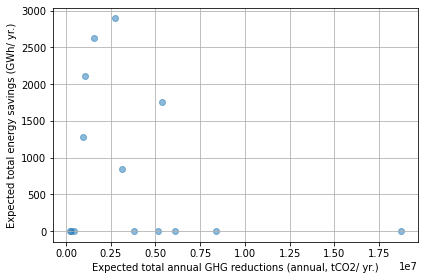

In [72]:
#expected energy savings and ghg reduction (Total)

fig, ax = plt.subplots()

ax.scatter(ghg_reduct_project.sum(), expect_energy.sum(), alpha = 0.5)

ax.set_xlabel('Expected total annual GHG reductions (annual, tCO2/ yr.)')
ax.set_ylabel('Expected total energy savings (GWh/ yr.)')
ax.set_title('Total Annual Expected GHG reductions and Energy Savings')
ax.grid(True)
fig.tight_layout()

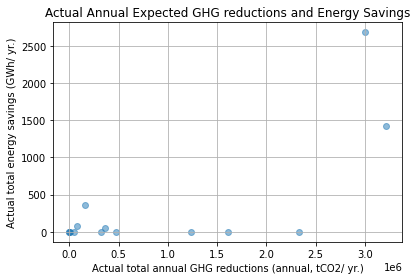

In [78]:
#expected energy savings and ghg reduction (Total)

fig, ax = plt.subplots()

ax.scatter(total_ghg_reduct_tech.sum(), actual_energy.sum(), alpha = 0.5)

ax.set_xlabel('Actual total annual GHG reductions (annual, tCO2/ yr.)')
ax.set_ylabel('Actual total energy savings (GWh/ yr.)')
ax.set_title('Actual Annual Expected GHG reductions and Energy Savings')
ax.grid(True)
fig.tight_layout()

<Figure size 1440x3600 with 0 Axes>

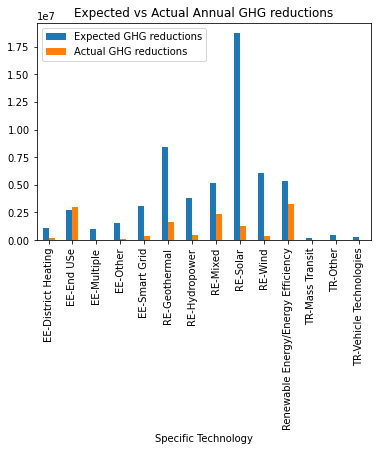

In [75]:
#bar showing expected vs actual ghg reductions per least year

ghg_effectiveness = pd.DataFrame({'Expected GHG reductions': ghg_reduct_project.sum(),
                                 'Actual GHG reductions': total_ghg_reduct_tech.sum()
                                 }
                                )

fig = plt.figure(figsize=(20,50))
ghg_effectiveness.plot.bar(title="Expected vs Actual Annual GHG reductions")

In [76]:
from mpl_toolkits.mplot3d import Axes3D

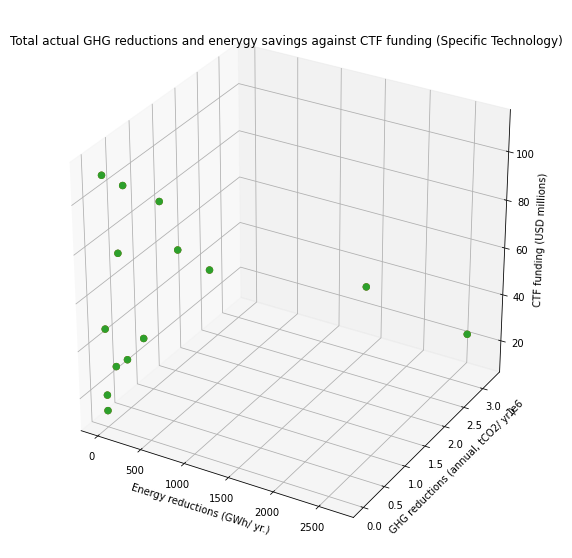

In [92]:
#3d scatter to show results of project (energy and ghg reductions) and average cost of funding

energy = actual_energy.sum()
ghg = total_ghg_reduct_tech.sum()
cost = technology_funding.mean()

data = (energy, ghg, cost)
groups = ('Specific Technology')


fig =plt.figure(figsize=(10,10))
ax= fig.add_subplot(111, projection='3d')
ax= fig.gca(projection='3d')

for data, groups in zip(data, groups):
    x = energy
    y = ghg
    z = cost
    
    ax.scatter(x,y,z, alpha=1, s=40, label =groups)
    
ax.set_xlabel('Energy reductions (GWh/ yr.)')
ax.set_ylabel('GHG reductions (annual, tCO2/ yr.)')
ax.set_zlabel('CTF funding (USD millions)')

plt.title('Total actual GHG reductions and enerygy savings against CTF funding (Specific Technology)')
plt.show()



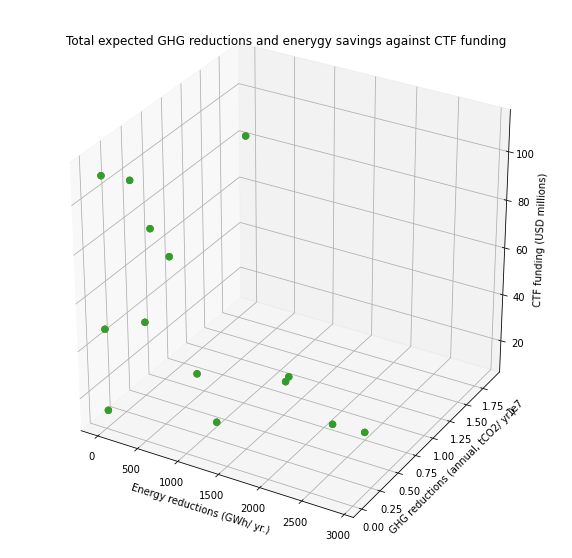

In [90]:
#3d scatter to show results of project (energy and ghg reductions) and average cost of funding

energy_ex = expect_energy.sum()
ghg_ex = ghg_reduct_project.sum()
cost = technology_funding.mean()

data = (energy_ex, ghg_ex, cost)
groups = ('Specific Technology')


fig =plt.figure(figsize=(10,10))
ax= fig.add_subplot(111, projection='3d')
ax= fig.gca(projection='3d')

for data, groups in zip(data, groups):
    x = energy_ex
    y = ghg_ex
    z = cost
    
    ax.scatter(x,y,z, alpha=1, s=40, label =groups)
    
ax.set_xlabel('Energy reductions (GWh/ yr.)')
ax.set_ylabel('GHG reductions (annual, tCO2/ yr.)')
ax.set_zlabel('CTF funding (USD millions)')

plt.title('Total expected GHG reductions and enerygy savings against CTF funding')
plt.show()



Text(0, 0.5, 'energy savings (GWh/ yr.)')

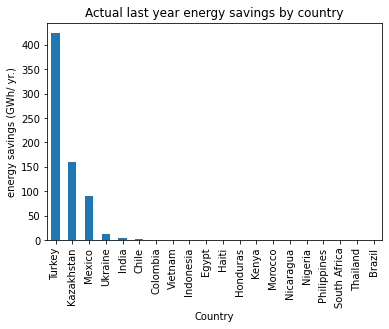

In [93]:
actual_energy_country = df['Actual Latest Year Energy savings (annual, GWh/ yr.)'].groupby(df['Country'])
plot_energy_actual_country = actual_energy_country.mean().sort_values(ascending=False).plot.bar(title='Actual last year energy savings by country')
plot_energy_actual_country.set_ylabel('energy savings (GWh/ yr.)')